In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import regex as re

from bs4 import BeautifulSoup
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords # Import the stop word list

import imp
plotting_util = imp.load_source('plotting_util', './plotting_utilities.py')
from plotting_util import Plotter
plotter = Plotter()

%matplotlib inline

[nltk_data] Downloading package wordnet to /home/dev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/dev/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
android_df = pd.read_csv('../data/android_dev.csv')
android_df.drop(['Unnamed: 0'], axis=1, inplace=True)
android_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,num_crossposts,media,is_video,post_hint,preview,link_flair_template_id,crosspost_parent_list,crosspost_parent,media_metadata,author_cakeday
0,NaN,androiddev,Looking for Android developers? Heard about a ...,t2_6l4z3,False,NaN,0,False,"Weekly ""who's hiring"" thread!",[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,androiddev,This thread is for simple questions that don't...,t2_6l4z3,False,NaN,0,False,"Weekly Questions Thread - January 20, 2020",[],...,0,NaN,False,self,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN
2,NaN,androiddev,NaN,t2_iassk,False,NaN,0,False,Telegram-like theme switching with reveal anim...,"[{'e': 'text', 't': 'Article'}]",...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,254cc416-e885-11e4-b88d-22000bc18061,NaN,NaN,NaN,NaN
3,NaN,androiddev,NaN,t2_3vf8x,False,NaN,0,False,The Power of Types for Errors,[],...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN
4,NaN,androiddev,NaN,t2_45tfbxxq,False,NaN,0,False,Everything you need to know about Memory Leaks...,[],...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN


In [3]:
ios_df = pd.read_csv('../data/ios_programming.csv')
ios_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ios_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,crosspost_parent_list,crosspost_parent,media_metadata,author_cakeday
0,NaN,iOSProgramming,Welcome to r/iOSProgramming! Click the links b...,t2_3h859,False,NaN,0,False,READ BEFORE POSTING / Megathread Hub,"[{'e': 'text', 't': 'Announcement'}]",...,https://www.reddit.com/r/iOSProgramming/commen...,66427,1.578431e+09,0,NaN,False,NaN,NaN,NaN,NaN
1,NaN,iOSProgramming,Welcome to the weekly r/iOSProgramming simple ...,t2_6l4z3,False,NaN,0,False,"Simple Questions Megathread—January 13, 2020","[{'e': 'text', 't': 'Weekly'}]",...,https://www.reddit.com/r/iOSProgramming/commen...,66427,1.578946e+09,0,NaN,False,NaN,NaN,NaN,NaN
2,NaN,iOSProgramming,NaN,t2_dw88zzd,False,NaN,0,False,Pull to Refresh in SwiftUI,"[{'e': 'text', 't': 'Article'}]",...,https://link.medium.com/1QgLlY4ho3,66427,1.579486e+09,0,NaN,False,NaN,NaN,NaN,NaN
3,NaN,iOSProgramming,Keeping up with the newest frameworks and tool...,t2_3hizc4vt,False,NaN,0,False,Developer's Guide to Common Vulnerabilities an...,"[{'e': 'text', 't': 'Article'}]",...,https://www.reddit.com/r/iOSProgramming/commen...,66427,1.579524e+09,0,NaN,False,NaN,NaN,NaN,NaN
4,NaN,iOSProgramming,People tell me there are 10x more web jobs tha...,t2_kgbts,False,NaN,0,False,Is there a shortage of iOS Developers?,"[{'e': 'text', 't': 'Question'}]",...,https://www.reddit.com/r/iOSProgramming/commen...,66427,1.579452e+09,0,NaN,False,NaN,NaN,NaN,NaN


In [4]:
combined_df = pd.concat([android_df, ios_df], sort=False)
combined_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,num_crossposts,media,is_video,post_hint,preview,link_flair_template_id,crosspost_parent_list,crosspost_parent,media_metadata,author_cakeday
0,NaN,androiddev,Looking for Android developers? Heard about a ...,t2_6l4z3,False,NaN,0,False,"Weekly ""who's hiring"" thread!",[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,androiddev,This thread is for simple questions that don't...,t2_6l4z3,False,NaN,0,False,"Weekly Questions Thread - January 20, 2020",[],...,0,NaN,False,self,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN
2,NaN,androiddev,NaN,t2_iassk,False,NaN,0,False,Telegram-like theme switching with reveal anim...,"[{'e': 'text', 't': 'Article'}]",...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,254cc416-e885-11e4-b88d-22000bc18061,NaN,NaN,NaN,NaN
3,NaN,androiddev,NaN,t2_3vf8x,False,NaN,0,False,The Power of Types for Errors,[],...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN
4,NaN,androiddev,NaN,t2_45tfbxxq,False,NaN,0,False,Everything you need to know about Memory Leaks...,[],...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN


## Pre-processing

**Handle null values**

In [5]:
combined_df.isnull().sum()

approved_at_utc           1978
subreddit                    0
selftext                   531
author_fullname              6
saved                        0
                          ... 
link_flair_template_id    1023
crosspost_parent_list     1936
crosspost_parent          1936
media_metadata            1899
author_cakeday            1973
Length: 109, dtype: int64

In [8]:
combined_df['author_flair_type'].value_counts()

text        1865
richtext     107
Name: author_flair_type, dtype: int64

In [9]:
combined_df['link_flair_type'].value_counts()

richtext    1075
text         903
Name: link_flair_type, dtype: int64

In [10]:
combined_df['subreddit'] = combined_df['subreddit'].map({'androiddev': 1, 'iOSProgramming': 0})

In [11]:
combined_df = combined_df[['id', 'title', 'name', 'media', 
                           'is_video', 'permalink', 'author_flair_type',
                           'link_flair_type', 'created', 'created_utc', 'selftext',
                           'author_fullname', 'subreddit']]

## Baseline Accuracy

In [12]:
df_1 = combined_df.copy()

In [13]:
df_1.dropna(subset=['selftext'], inplace=True)

In [14]:
df_1['subreddit'].value_counts(normalize=True)

1    0.500346
0    0.499654
Name: subreddit, dtype: float64

In [15]:
# Import lemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
df_1.columns

Index(['id', 'title', 'name', 'media', 'is_video', 'permalink',
       'author_flair_type', 'link_flair_type', 'created', 'created_utc',
       'selftext', 'author_fullname', 'subreddit'],
      dtype='object')

In [17]:
def review_to_words(raw_post):
    # Function to convert a raw reddit post to a string of words
    # The input is a single string (a raw reddit post), and 
    # the output is a single string (a preprocessed reddit post)
    
    # 1. Remove HTML.
    post_text = BeautifulSoup(raw_post).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", post_text)
    letters_only = re.sub(r'^https?:\/\/.*[\r\n]*', '', letters_only)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [18]:
X = df_1['selftext']
# X = combined_df['selftext'].apply(review_to_words)
y = df_1['subreddit']

In [19]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size = 0.25,
                                                    random_state = 42)

## Multinomial Naive Bayes

In [20]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])

In [21]:
pipe_params = {
#     'cvec__tokenizer': [lemmatizer.lemmatize, p_stemmer.stem],
    'cvec__max_features': [2500, 3000, 3500, 4000, 4500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train) # gs.fit(X_train['selftext'], y_train)
print(gs.best_score_)
gs.best_params_

0.8341189554286997


{'cvec__max_df': 0.9,
 'cvec__max_features': 4500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [22]:
gs.score(X_train, y_train) 

0.9815668202764977

In [23]:
gs.score(X_test, y_test)

0.8342541436464088

In [24]:
predictions = gs.predict(X_test)

In [25]:
confusion_matrix(y_test, predictions)

array([[153,  28],
       [ 32, 149]])

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [27]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 153
False Positives: 28
False Negatives: 32
True Positives: 149


In [28]:
def get_classification_metrics(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    misclassification = 1 - accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    
    print("Accuracy: %s" % accuracy)
    print("Misclassification: %s" % misclassification)
    print("Sensitivity: %s" % sensitivity)
    print("Specificity: %s" % specificity)
    print("Precision: %s" % precision)

In [29]:
get_classification_metrics(tn, fp, fn, tp)

Accuracy: 0.8342541436464088
Misclassification: 0.16574585635359118
Sensitivity: 0.8232044198895028
Specificity: 0.8453038674033149
Precision: 0.8418079096045198


In [30]:
pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': pred_proba})

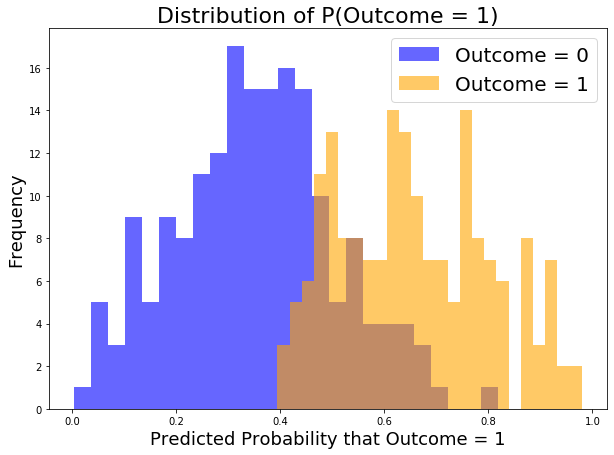

In [31]:
plotter.plot_probability_distribution(pred_df)

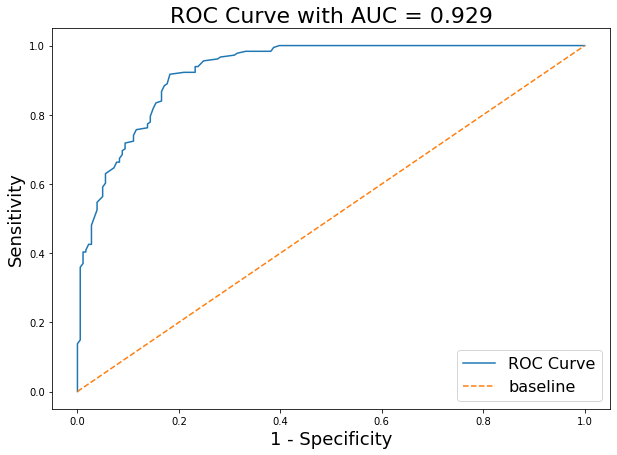

In [32]:
plotter.plot_roc_curve(pred_df=pred_df)

## Logistic Regression

In [33]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression(max_iter=5000))
])

In [34]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500, 4000, 4500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
# gs.fit(pd.Series(clean_train_reviews), y_train)
print(gs.best_score_)
gs.best_params_

0.8534585227243742


{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [35]:
gs.score(X_train, y_train)

0.9834101382488479

In [36]:
gs.score(X_test, y_test)

0.8425414364640884

In [37]:
predictions = gs.predict(X_test)

In [38]:
confusion_matrix(y_test, predictions)

array([[153,  28],
       [ 29, 152]])

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [40]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 153
False Positives: 28
False Negatives: 29
True Positives: 152


In [41]:
get_classification_metrics(tn, fp, fn, tp)

Accuracy: 0.8425414364640884
Misclassification: 0.1574585635359116
Sensitivity: 0.8397790055248618
Specificity: 0.8453038674033149
Precision: 0.8444444444444444


In [42]:
pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

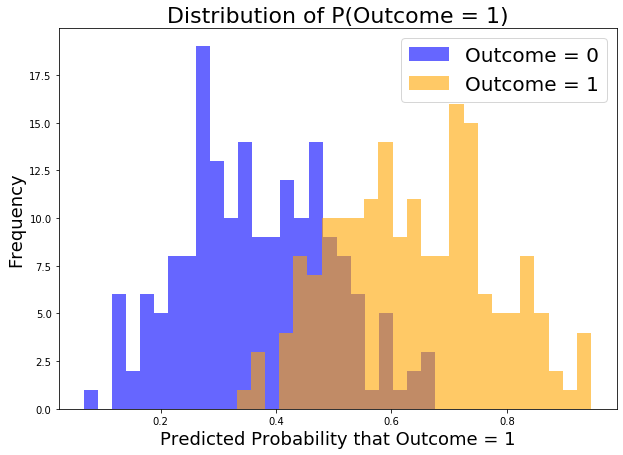

In [43]:
plotter.plot_probability_distribution(pred_df)

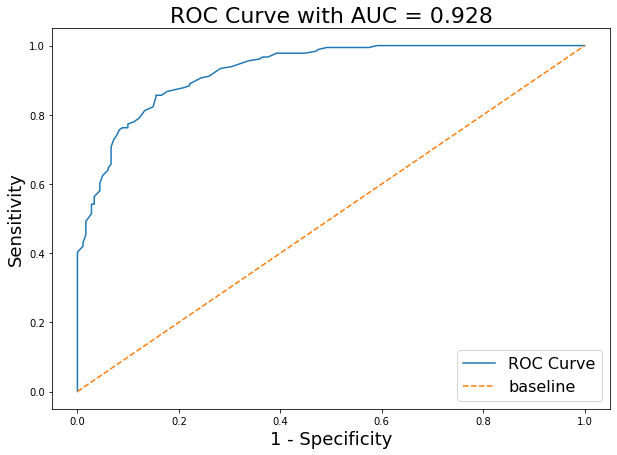

In [44]:
plotter.plot_roc_curve(pred_df=pred_df)

## Feature Engineering

In [58]:
df_2 = combined_df.copy()

In [60]:
df_2[['title', 'selftext']].isnull().sum()

title         0
selftext    531
dtype: int64

Since there is no null value in the title variable, we convert null values in the selftext variable to empty strings.

In [61]:
df_2['content'] = df_2['title'] + " " + df_2['selftext'].fillna('')

In [63]:
df_2['subreddit'].value_counts(normalize=True)

0    0.504044
1    0.495956
Name: subreddit, dtype: float64

In [64]:
df_2.columns

Index(['id', 'title', 'name', 'media', 'is_video', 'permalink',
       'author_flair_type', 'link_flair_type', 'created', 'created_utc',
       'selftext', 'author_fullname', 'subreddit', 'content'],
      dtype='object')

In [65]:
X = df_2['content']
# X = combined_df['selftext'].apply(review_to_words)
y = df_2['subreddit']

In [66]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size = 0.25,
                                                    random_state = 42)

## Multinomial Naive Bayes

In [67]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])

In [68]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500, 4000, 4500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train) # gs.fit(X_train['selftext'], y_train)
print(gs.best_score_)
gs.best_params_

0.8644542591911013


{'cvec__max_df': 0.9,
 'cvec__max_features': 4500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [69]:
gs.score(X_train, y_train) 

0.973701955495617

In [70]:
gs.score(X_test, y_test)

0.8909090909090909

In [71]:
predictions = gs.predict(X_test)

In [72]:
confusion_matrix(y_test, predictions)

array([[232,  18],
       [ 36, 209]])

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [74]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 232
False Positives: 18
False Negatives: 36
True Positives: 209


In [75]:
def get_classification_metrics(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    misclassification = 1 - accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    
    print("Accuracy: %s" % accuracy)
    print("Misclassification: %s" % misclassification)
    print("Sensitivity: %s" % sensitivity)
    print("Specificity: %s" % specificity)
    print("Precision: %s" % precision)

In [76]:
get_classification_metrics(tn, fp, fn, tp)

Accuracy: 0.8909090909090909
Misclassification: 0.10909090909090913
Sensitivity: 0.8530612244897959
Specificity: 0.928
Precision: 0.920704845814978


In [77]:
pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': pred_proba})

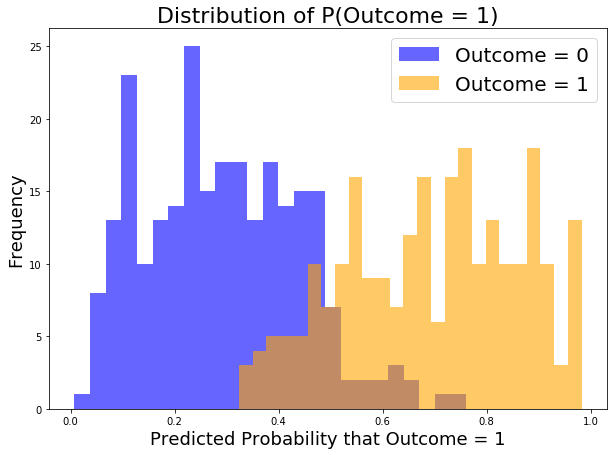

In [78]:
plotter.plot_probability_distribution(pred_df)

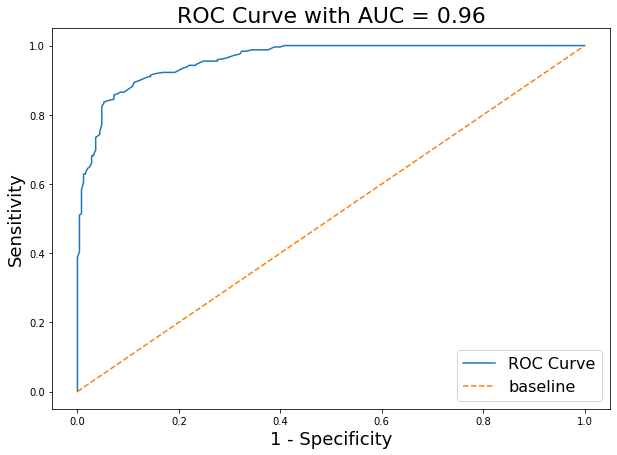

In [79]:
plotter.plot_roc_curve(pred_df=pred_df)

## Logistic Regression

In [80]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression(max_iter=5000))
])

In [81]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500, 4000, 4500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
# gs.fit(pd.Series(clean_train_reviews), y_train)
print(gs.best_score_)
gs.best_params_

0.8759170653907496


{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [82]:
gs.score(X_train, y_train)

0.9710047201618341

In [83]:
gs.score(X_test, y_test)

0.8727272727272727

In [84]:
predictions = gs.predict(X_test)

In [85]:
confusion_matrix(y_test, predictions)

array([[229,  21],
       [ 42, 203]])

In [86]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [87]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 229
False Positives: 21
False Negatives: 42
True Positives: 203


In [88]:
get_classification_metrics(tn, fp, fn, tp)

Accuracy: 0.8727272727272727
Misclassification: 0.12727272727272732
Sensitivity: 0.8285714285714286
Specificity: 0.916
Precision: 0.90625


In [89]:
pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

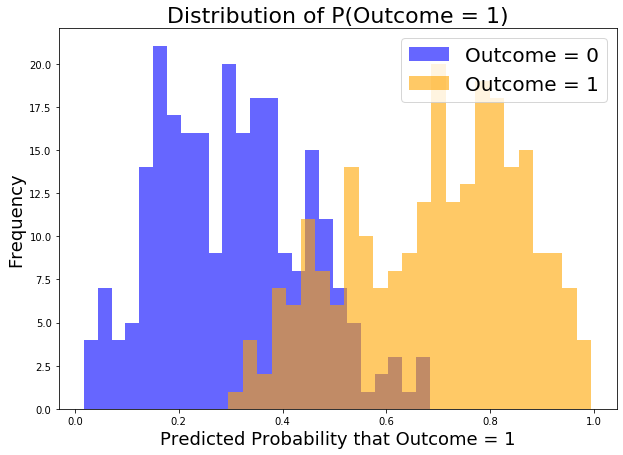

In [90]:
plotter.plot_probability_distribution(pred_df)

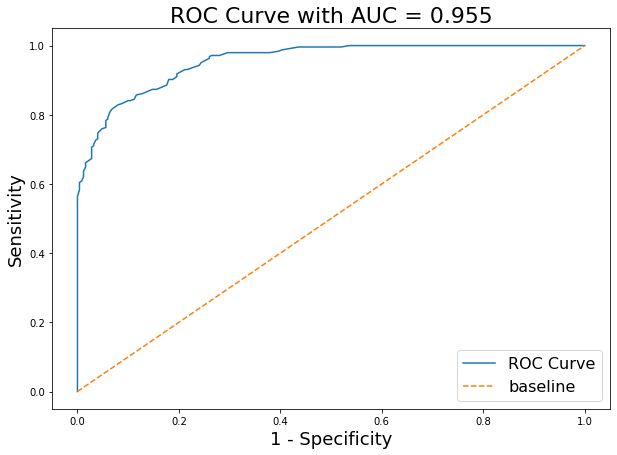

In [91]:
plotter.plot_roc_curve(pred_df=pred_df)

## More verbose code?

In [ ]:
# # Import CountVectorizer.
# from sklearn.feature_extraction.text import CountVectorizer

# # Instantiate the "CountVectorizer" object, which is scikit-learn's bag of words tool.
# vectorizer = CountVectorizer(analyzer = "word",
#                              tokenizer = None,
#                              preprocessor = None,
#                              stop_words = None,
#                              max_features = 5000) 

In [ ]:
# # fit_transform() does two functions: First, it fits the model
# # and learns the vocabulary; second, it transforms our training data
# # into feature vectors. The input to fit_transform should be a list of 
# # strings.

# train_data_features = vectorizer.fit_transform(clean_train_reviews)
# test_data_features = vectorizer.transform(clean_test_reviews)

# # Numpy arrays are easy to work with, so convert the result to an array.

# train_data_features = train_data_features.toarray()
# test_data_features = test_data_features.toarray()

In [ ]:
# X_train_df = pd.DataFrame(train_data_features,
#                           columns=vectorizer.get_feature_names())

In [ ]:
# X_train_df.shape

In [ ]:
# X_test_df = pd.DataFrame(test_data_features, 
#                          columns=vectorizer.get_feature_names())
# X_test_df.shape

In [ ]:
# print(train_data_features.shape)
# print(test_data_features.shape)

In [ ]:
# vocab = vectorizer.get_feature_names()
# print(vocab)

In [ ]:
# # Instantiate logistic regression model.
# lr = LogisticRegression()

# # Fit model to training data.
# lr.fit(train_data_features, y_train)

In [ ]:
# # Evaluate model on training data.
# lr.score(train_data_features, y_train)

In [ ]:
# # Evaluate model on testing data.
# lr.score(test_data_features, y_test)